# LSTM Time Series Modeling NVIDIA 2024 Stocks Using TensorFlow:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvidia-corporation-2024-stock-market-dataset/NVIDIA 2024 Stock Market Data.csv


In [3]:
nvidia_stock = pd.read_csv("/kaggle/input/nvidia-corporation-2024-stock-market-dataset/NVIDIA 2024 Stock Market Data.csv")
nvidia_stock

,Date,Close,Open,High,Low,Volume
0,1/2/24,$48.17,$49.24,$49.30,$47.60,"411,254,220"
1,1/3/24,$47.57,$47.49,$48.18,$47.32,"320,896,170"
2,1/4/24,$48.00,$47.77,$48.50,$47.51,"306,534,890"
3,1/5/24,$49.10,$48.46,$49.55,$48.31,"415,039,270"
4,1/8/24,$52.25,$49.51,$52.28,$49.48,"642,509,900"
...,...,...,...,...,...,...
243,12/18/24,$128.91,$133.86,$136.70,$128.28,"277,444,533"
244,12/19/24,$130.68,$131.76,$134.03,$129.55,"209,719,210"
245,12/20/24,$134.70,$129.81,$135.28,$128.22,"306,528,553"
246,12/23/24,$139.67,$136.28,$139.79,$135.12,"176,053,506"


In [4]:
nvidia_stock.columns = nvidia_stock.columns.str.lower().str.replace(' ', '_')
nvidia_stock

,date,close,open,high,low,volume
0,1/2/24,$48.17,$49.24,$49.30,$47.60,"411,254,220"
1,1/3/24,$47.57,$47.49,$48.18,$47.32,"320,896,170"
2,1/4/24,$48.00,$47.77,$48.50,$47.51,"306,534,890"
3,1/5/24,$49.10,$48.46,$49.55,$48.31,"415,039,270"
4,1/8/24,$52.25,$49.51,$52.28,$49.48,"642,509,900"
...,...,...,...,...,...,...
243,12/18/24,$128.91,$133.86,$136.70,$128.28,"277,444,533"
244,12/19/24,$130.68,$131.76,$134.03,$129.55,"209,719,210"
245,12/20/24,$134.70,$129.81,$135.28,$128.22,"306,528,553"
246,12/23/24,$139.67,$136.28,$139.79,$135.12,"176,053,506"


In [5]:
nvidia_stock['date'] = pd.to_datetime(nvidia_stock['date'])
nvidia_stock

<ipython-input-5-50ee0394dfdd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nvidia_stock['date'] = pd.to_datetime(nvidia_stock['date'])


,date,close,open,high,low,volume
0,2024-01-02,$48.17,$49.24,$49.30,$47.60,"411,254,220"
1,2024-01-03,$47.57,$47.49,$48.18,$47.32,"320,896,170"
2,2024-01-04,$48.00,$47.77,$48.50,$47.51,"306,534,890"
3,2024-01-05,$49.10,$48.46,$49.55,$48.31,"415,039,270"
4,2024-01-08,$52.25,$49.51,$52.28,$49.48,"642,509,900"
...,...,...,...,...,...,...
243,2024-12-18,$128.91,$133.86,$136.70,$128.28,"277,444,533"
244,2024-12-19,$130.68,$131.76,$134.03,$129.55,"209,719,210"
245,2024-12-20,$134.70,$129.81,$135.28,$128.22,"306,528,553"
246,2024-12-23,$139.67,$136.28,$139.79,$135.12,"176,053,506"


In [6]:
nvidia_stock.dtypes

date      datetime64[ns]
close             object
open              object
high              object
low               object
volume            object
dtype: object

In [7]:
# Replace commas and then convert the column to numeric
nvidia_stock['volume'] = nvidia_stock['volume'].str.replace(',', '')
nvidia_stock

,date,close,open,high,low,volume
0,2024-01-02,$48.17,$49.24,$49.30,$47.60,411254220
1,2024-01-03,$47.57,$47.49,$48.18,$47.32,320896170
2,2024-01-04,$48.00,$47.77,$48.50,$47.51,306534890
3,2024-01-05,$49.10,$48.46,$49.55,$48.31,415039270
4,2024-01-08,$52.25,$49.51,$52.28,$49.48,642509900
...,...,...,...,...,...,...
243,2024-12-18,$128.91,$133.86,$136.70,$128.28,277444533
244,2024-12-19,$130.68,$131.76,$134.03,$129.55,209719210
245,2024-12-20,$134.70,$129.81,$135.28,$128.22,306528553
246,2024-12-23,$139.67,$136.28,$139.79,$135.12,176053506


In [8]:
import pandas as pd

# Attempt to replace the dollar sign and convert to float
try:
    nvidia_stock['close'] = nvidia_stock['close'].str.replace('$', '').astype(float)
except Exception as e:
    print(f"Error: {e}")
try:
    nvidia_stock['open'] = nvidia_stock['open'].str.replace('$', '').astype(float)
except Exception as e:
    print(f"Error: {e}")
try:
    nvidia_stock['high'] = nvidia_stock['high'].str.replace('$', '').astype(float)
except Exception as e:
    print(f"Error: {e}")
try:
    nvidia_stock['low'] = nvidia_stock['low'].str.replace('$', '').astype(float)
except Exception as e:
    print(f"Error: {e}")

# Check if there are any entries that could not be converted
print(nvidia_stock['close'][nvidia_stock['close'].apply(lambda x: isinstance(x, str))])
print(nvidia_stock['open'][nvidia_stock['open'].apply(lambda x: isinstance(x, str))])
print(nvidia_stock['high'][nvidia_stock['high'].apply(lambda x: isinstance(x, str))])
print(nvidia_stock['low'][nvidia_stock['low'].apply(lambda x: isinstance(x, str))])


Series([], Name: close, dtype: float64)
Series([], Name: open, dtype: float64)
Series([], Name: high, dtype: float64)
Series([], Name: low, dtype: float64)


In [9]:
# Convert the 'volume' column to numeric, coercing errors to NaN (if any non-convertible values exist)
# 'coerce': Any value that cannot be converted to a numeric type (for instance, non-numeric strings) will be changed to NaN (Not a Number). This ensures that the conversion process does not fail and allows the operation to complete, but at the expense of losing the information contained in the non-convertible values.
nvidia_stock['volume'] = pd.to_numeric(nvidia_stock['volume'])
nvidia_stock['close'] = pd.to_numeric(nvidia_stock['close'])
nvidia_stock['open'] = pd.to_numeric(nvidia_stock['open'])
nvidia_stock['high'] = pd.to_numeric(nvidia_stock['high'])
nvidia_stock['low'] = pd.to_numeric(nvidia_stock['low'])

nvidia_stock.dtypes

date      datetime64[ns]
close            float64
open             float64
high             float64
low              float64
volume             int64
dtype: object

In [10]:
nvidia_stock['volume_byB'] = nvidia_stock['volume'] / 1e9
nvidia_stock

,date,close,open,high,low,volume,volume_byB
0,2024-01-02,48.17,49.24,49.30,47.60,411254220,0.411254
1,2024-01-03,47.57,47.49,48.18,47.32,320896170,0.320896
2,2024-01-04,48.00,47.77,48.50,47.51,306534890,0.306535
3,2024-01-05,49.10,48.46,49.55,48.31,415039270,0.415039
4,2024-01-08,52.25,49.51,52.28,49.48,642509900,0.642510
...,...,...,...,...,...,...,...
243,2024-12-18,128.91,133.86,136.70,128.28,277444533,0.277445
244,2024-12-19,130.68,131.76,134.03,129.55,209719210,0.209719
245,2024-12-20,134.70,129.81,135.28,128.22,306528553,0.306529
246,2024-12-23,139.67,136.28,139.79,135.12,176053506,0.176054


In [11]:
nvidia_stock.dtypes

date          datetime64[ns]
close                float64
open                 float64
high                 float64
low                  float64
volume                 int64
volume_byB           float64
dtype: object

## Summary

In [12]:
print(nvidia_stock.describe())

                                date       close       open        high  \
count                            248  248.000000  248.00000  248.000000   
mean   2024-06-28 22:03:52.258064640  107.352137  107.41754  109.373992   
min              2024-01-02 00:00:00   47.570000   47.49000   48.180000   
25%              2024-04-01 18:00:00   87.687500   87.56000   89.167500   
50%              2024-06-29 12:00:00  114.540000  115.18500  116.615000   
75%              2024-09-26 06:00:00  129.430000  129.84750  131.672500   
max              2024-12-24 00:00:00  148.880000  149.35000  152.890000   
std                              NaN   26.911353   27.09345   27.394735   

              low        volume  volume_byB  
count  248.000000  2.480000e+02  248.000000  
mean   105.156573  3.809906e+08    0.380991  
min     47.320000  1.051570e+08    0.105157  
25%     86.027500  2.565828e+08    0.256583  
50%    111.440000  3.573289e+08    0.357329  
75%    127.165000  4.767220e+08    0.476722  
ma

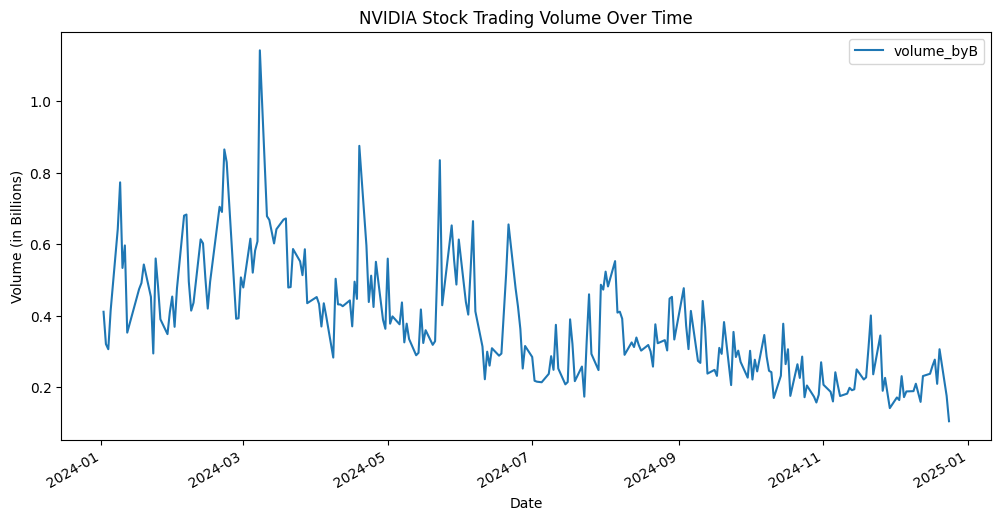

In [13]:
nvidia_stock.set_index('date')[['volume_byB']].plot(figsize=(12, 6))
plt.title('NVIDIA Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in Billions)')
plt.show()

## ML Modeling (LSTM)

### Splitting

In [14]:
train_size = int(len(nvidia_stock) * 0.8)
train, test = nvidia_stock[:train_size], nvidia_stock[train_size:]

# Normalizing the volume data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['volume_byB']])
test_scaled = scaler.transform(test[['volume_byB']])

### Processing

In [15]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 30  # Using the past 30 days to predict the next day
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### LSTM Model Building

In [16]:
# # Simplifying the model if overfitting
# model = Sequential()
# model.add(LSTM(32, input_shape=(X_train.shape[1], 1)))  # Reduced number of units
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mean_squared_error')

# Or, enhancing the model if underfitting
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1)
])

# Example of increasing epochs and adjusting learning rate
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.1298 - val_loss: 0.0124
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0441 - val_loss: 0.0068
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0221 - val_loss: 0.0030
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0245 - val_loss: 0.0035
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - val_loss: 0.0053
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0187 - val_loss: 0.0047
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 - val_loss: 0.0037
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0147 - val_loss: 0.0042
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - val_loss: 0.0046
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - val_loss: 0.0039
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - val_loss: 0.0038
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - val_loss: 0.0042
Epoch 13/30


### Train LSTM

In [17]:
#Early Stopping
#Use early stopping to halt the training process once the model performance stops improving on the validation data.

# from tensorflow.keras.callbacks import EarlyStopping

# # Setup early stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Fit the model with early stopping
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
#                     validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)


Overfitting: The training loss decreases continuously, while the validation loss decreases initially but then increases.
Underfitting: Both training and validation losses are high, and they decrease very slowly or plateau early.

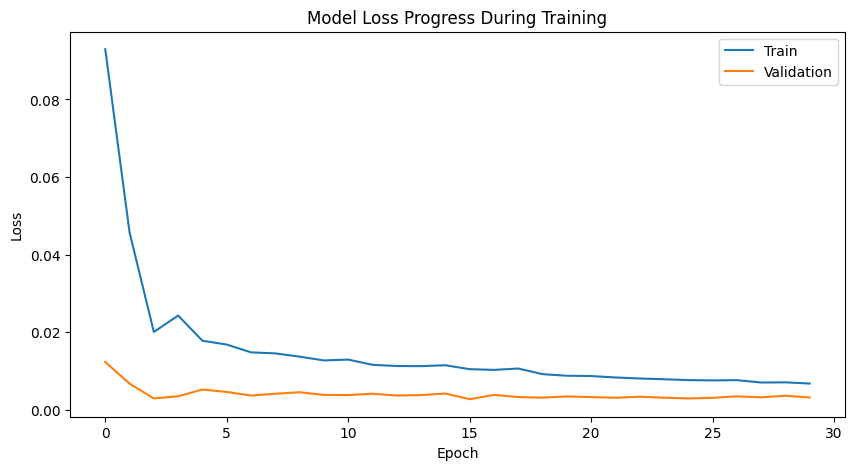

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progress During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


When the training and validation loss functions are far apart and not reducing, it usually indicates an issue with the model, such as overfitting or underfitting. Overfitting happens when your model learns the details and noise in the training data to an extent that it negatively impacts the performance of the model on new data (i.e., the validation data). Underfitting occurs when the model is too simple to learn the underlying pattern of the data.

Reasons for Overfitting or Underfitting
Overfitting:
The model is too complex with too many parameters.
Insufficient amount of training data.
Too many training epochs leading to learning detailed noise in the training dataset.
Underfitting:
The model is too simple to capture the underlying trend of the data.
Insufficient training epochs.
Poor choice of model hyperparameters.

### Model Metrics Evaluation

In [19]:
from sklearn.metrics import mean_squared_error

def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Making predictions on test data
predicted_volume = model.predict(X_test)
predicted_volume = scaler.inverse_transform(predicted_volume)

rmse = np.sqrt(mean_squared_error(test['volume_byB'][time_step + 1:], predicted_volume))
print("Root Mean Square Error (RMSE):", rmse)

mape = calculate_mape(test['volume_byB'][time_step + 1:], predicted_volume)
print("Mean Absolute Percentage Error (MAPE):", mape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Root Mean Square Error (RMSE): 0.06731796799141983
Mean Absolute Percentage Error (MAPE): 31.01897193481865


Interpretation: An RMSE value of 0.073 means that, on average, the model’s predictions deviate from the actual values by 0.073 units on the scale of the target variable. **The lower the RMSE, the better, as it indicates smaller residuals (errors between observed and predicted values)**. The absolute value should be compared against the range or distribution of the target variables to assess its impact. If your target variable ranges over a wide scale (say 0 to 1 or more), an RMSE of 0.073 could be quite good.

Interpretation: A MAPE of 34.66% suggests that the model predictions deviate from the actual values by an average of 34.66% per data point. **High MAPE values indicate less accurate models**. This metric is particularly useful when you want to know how big the error is relative to the size of the numbers in your data. A 34.66% MAPE can be considered high for many applications, indicating that there might be significant errors in some of the model’s predictions or that the model may not perform consistently across the data range.

In [20]:
# Making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test_inv = scaler.inverse_transform([y_test])

# Calculate RMSE
from sklearn.metrics import mean_squared_error
trainScore = np.sqrt(mean_squared_error(Y_train_inv[0], train_predict[:,0]))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(mean_squared_error(Y_test_inv[0], test_predict[:,0]))
print(f'Test Score: {testScore:.2f} RMSE')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Train Score: 0.08 RMSE
Test Score: 0.06 RMSE


Interpretation of the Results:

Train Score: 0.06 RMSE - This score indicates that, on average, the model's predictions on the training data deviate from the actual observed values by 0.06. This suggests that the model fits the training data quite well, assuming the scale of the data is such that a difference of 0.06 is small.

Test Score: 0.06 RMSE - This score shows that the model also performs similarly on the test data, with the average deviation of the predictions from the actual values being 0.06. This is particularly important as it suggests that the model generalizes well to new, unseen data, maintaining the same level of performance as observed in the training phase.

Overfitting would be indicated by a low training RMSE and a much higher test RMSE.

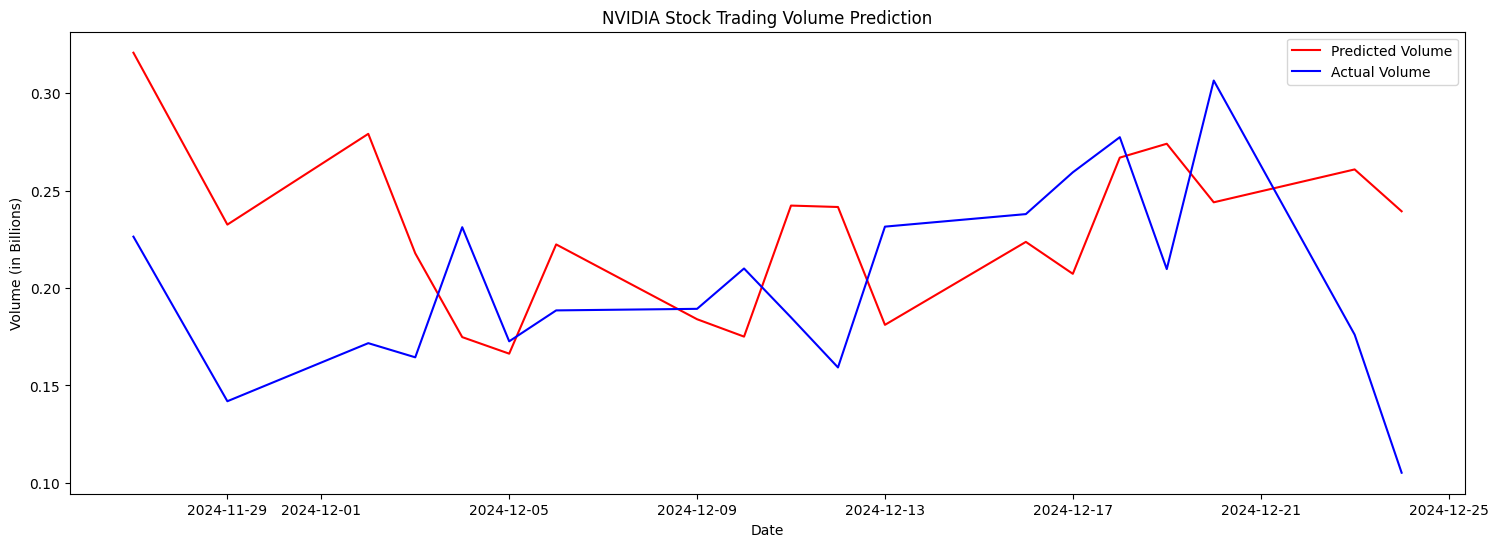

In [21]:
# Plotting the results
plt.figure(figsize=(18, 6))
plt.plot(test['date'][time_step + 1:], predicted_volume, color='red', label='Predicted Volume')
plt.plot(test['date'][time_step + 1:], test['volume_byB'][time_step + 1:], color='blue', label='Actual Volume')
plt.title('NVIDIA Stock Trading Volume Prediction')
plt.xlabel('Date')
plt.ylabel('Volume (in Billions)')
plt.legend()
plt.show()